# Simulate a supermarket 

In [951]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt
from datetime import timedelta
import csv
import time

In [952]:
def load_data(files, path):
    """This function implements automatization for loading the csv files into dataframes and 
    combines all of them into one 
    
    Args:
    files (list): a list of all file present in this directory
    path (str, default value): the path to the file
    
    Return:
    df_combined (dataframe): a concated df of all year
    """
    all_days=[]
    for file in files:
        df_day=pd.read_csv(path+file, sep=';',)
        all_days.append(df_day)
    df=pd.concat(all_days, axis=0, ignore_index=True)
    
    return df

In [953]:
!head ./data/*.csv

==> ./data/friday.csv <==
timestamp;customer_no;location
2019-09-06 07:00:00;1;dairy
2019-09-06 07:00:00;2;drinks
2019-09-06 07:00:00;3;fruit
2019-09-06 07:01:00;2;checkout
2019-09-06 07:01:00;4;drinks
2019-09-06 07:01:00;5;dairy
2019-09-06 07:02:00;4;checkout
2019-09-06 07:02:00;6;spices
2019-09-06 07:02:00;7;dairy

==> ./data/monday.csv <==
timestamp;customer_no;location
2019-09-02 07:03:00;1;dairy
2019-09-02 07:03:00;2;dairy
2019-09-02 07:04:00;3;dairy
2019-09-02 07:04:00;4;dairy
2019-09-02 07:04:00;5;spices
2019-09-02 07:04:00;6;spices
2019-09-02 07:04:00;7;spices
2019-09-02 07:04:00;8;fruit
2019-09-02 07:05:00;1;checkout

==> ./data/thursday.csv <==
timestamp;customer_no;location
2019-09-05 07:00:00;1;drinks
2019-09-05 07:01:00;2;fruit
2019-09-05 07:01:00;3;dairy
2019-09-05 07:01:00;4;dairy
2019-09-05 07:02:00;1;checkout
2019-09-05 07:02:00;4;checkout
2019-09-05 07:03:00;5;dairy
2019-09-05 07:04:00;6;dairy
2019-09-05 07:04:00;7;fruit

==> ./data/tuesday.csv <==
timestamp;customer_

### Load data

In [954]:
Files=os.listdir('./data/')
Path='./data/'
Files
df=load_data(files=Files, path=Path)
df['timestamp']=pd.to_datetime(df['timestamp'])
#df=df.set_index('timestamp')
df['day']= df['timestamp'].dt.day
df['hour']= df['timestamp'].dt.hour
df['minute']= df['timestamp'].dt.minute
df

,timestamp,customer_no,location,day,hour,minute
0,2019-09-03 07:02:00,1,fruit,3,7,2
1,2019-09-03 07:02:00,2,drinks,3,7,2
2,2019-09-03 07:03:00,3,dairy,3,7,3
3,2019-09-03 07:05:00,1,drinks,3,7,5
4,2019-09-03 07:06:00,4,dairy,3,7,6
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,6,21,50
24873,2019-09-06 21:50:00,1507,checkout,6,21,50
24874,2019-09-06 21:50:00,1508,checkout,6,21,50
24875,2019-09-06 21:50:00,1509,drinks,6,21,50


In [955]:
df

,timestamp,customer_no,location,day,hour,minute
0,2019-09-03 07:02:00,1,fruit,3,7,2
1,2019-09-03 07:02:00,2,drinks,3,7,2
2,2019-09-03 07:03:00,3,dairy,3,7,3
3,2019-09-03 07:05:00,1,drinks,3,7,5
4,2019-09-03 07:06:00,4,dairy,3,7,6
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,6,21,50
24873,2019-09-06 21:50:00,1507,checkout,6,21,50
24874,2019-09-06 21:50:00,1508,checkout,6,21,50
24875,2019-09-06 21:50:00,1509,drinks,6,21,50


## EDA

#### Calculate the total number of customers in each section over time

In [956]:
df.groupby(['location','timestamp'])['customer_no'].count()

location  timestamp          
checkout  2019-09-02 07:05:00    2
          2019-09-02 07:06:00    2
          2019-09-02 07:07:00    1
          2019-09-02 07:08:00    3
          2019-09-02 07:09:00    1
                                ..
spices    2019-09-06 21:28:00    1
          2019-09-06 21:31:00    1
          2019-09-06 21:42:00    1
          2019-09-06 21:49:00    1
          2019-09-06 21:50:00    1
Name: customer_no, Length: 13839, dtype: int64

#### Display the number of customers at checkout over time

<AxesSubplot:xlabel='timestamp'>

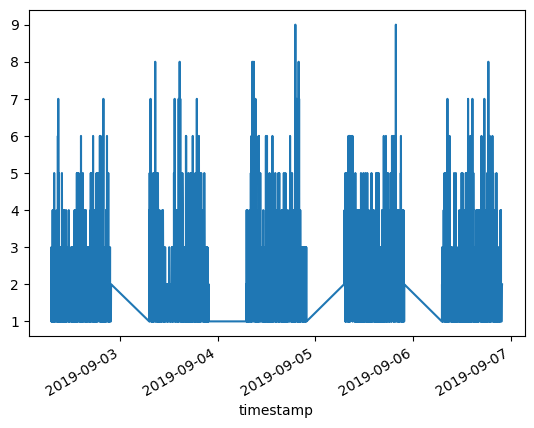

In [957]:
df_checkout=df.loc[df['location']=='checkout']
df_checkout.groupby('timestamp')['customer_no'].count().plot()

#### Calculate the time each customer spent in the market

In [958]:
time_per_day_per_cus=df.groupby(['customer_no','day'])['timestamp'].apply(lambda x: x.max()-x.min())
time_per_day_per_cus

customer_no  day
1            2     0 days 00:02:00
             3     0 days 00:10:00
             4     0 days 00:02:00
             5     0 days 00:02:00
             6     0 days 00:05:00
                         ...      
1531         5     0 days 00:03:00
1532         5     0 days 00:00:00
1533         5     0 days 00:00:00
1534         5     0 days 00:01:00
1535         5     0 days 00:01:00
Name: timestamp, Length: 7445, dtype: timedelta64[ns]

In [959]:
time_per_day_per_cus.mean()

Timedelta('0 days 00:06:14.409670920')

In [960]:
time_of_cus=[]
for i in range(1,(df.customer_no.max()+1)):
       time_of_cus.append(time_per_day_per_cus[i].sum().total_seconds()/ 60)

Text(0, 0.5, 'Minues_spent_in_shop')

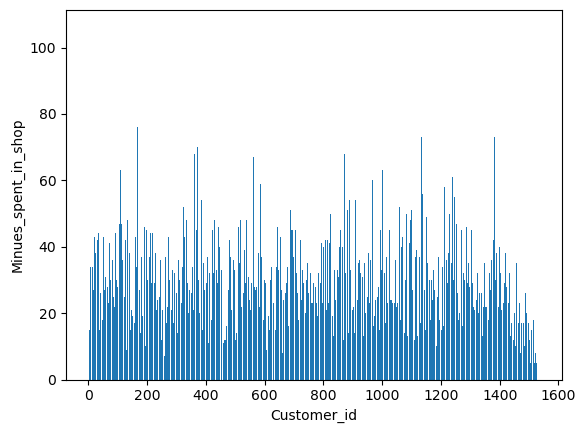

In [961]:
plt.bar(range(1,(df.customer_no.max()+1)),time_of_cus)
plt.xlabel('Customer_id')
plt.ylabel('Minues_spent_in_shop')


#### Calculate the total number of customers in the supermarket over time.

<AxesSubplot:xlabel='timestamp'>

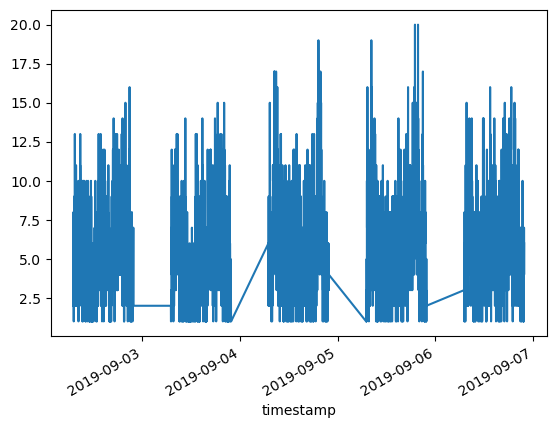

In [962]:
df.groupby(['timestamp'])['customer_no'].count().plot()

#### The mean of above

<AxesSubplot:xlabel='hour,minute'>

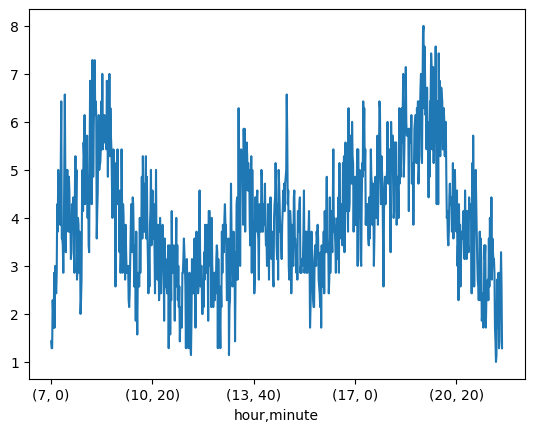

In [963]:
df_all_over_time=(df.groupby(['hour','minute'])['customer_no'].count()/7).plot()
(df_all_over_time)

##### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

#### It does not make any sense:)))

### Calculate the initial distribution

In [1076]:
P_I=[]
coming_time=df.groupby(['customer_no', 'day'])['timestamp'].apply(lambda x: x.min())
coming_time

customer_no  day  location
1            2    checkout   2019-09-02 07:05:00
                  dairy      2019-09-02 07:03:00
             3    checkout   2019-09-03 07:12:00
                  drinks     2019-09-03 07:05:00
                  fruit      2019-09-03 07:02:00
                                     ...        
1533         5    dairy      2019-09-05 21:48:00
1534         5    checkout   2019-09-05 21:49:00
                  fruit      2019-09-05 21:48:00
1535         5    checkout   2019-09-05 21:49:00
                  spices     2019-09-05 21:48:00
Name: timestamp, Length: 21671, dtype: datetime64[ns]

In [965]:
for items in ['dairy', 'fruit', 'drinks', 'spices', 'checkout']:
    P_I.append(df['customer_no'].loc[df['location']==items].count()/len(df))
P_I

[0.18808538006994413,
 0.20589299352815854,
 0.15697230373437313,
 0.15090244000482372,
 0.2981468826627005]

In [966]:
#P_I=[0.29808538006994413,0.10589299352815854,0.10697230373437313,0.23090244000482372,0.2581468826627005]

np.sum(P_I)

1.0

## Calculating the transition probabilities:

In [901]:
df=df.set_index('timestamp')
df_min=df.groupby(['customer_no','day']).resample('1Min').ffill()

In [902]:
df_min

customer_no  location  day  hour  minute
customer_no day timestamp                                                    
1           2   2019-09-02 07:03:00            1     dairy    2     7       3
                2019-09-02 07:04:00            1     dairy    2     7       3
                2019-09-02 07:05:00            1  checkout    2     7       5
            3   2019-09-03 07:02:00            1     fruit    3     7       2
                2019-09-03 07:03:00            1     fruit    3     7       2
...                                          ...       ...  ...   ...     ...
1533        5   2019-09-05 21:48:00         1533     dairy    5    21      48
1534        5   2019-09-05 21:48:00         1534     fruit    5    21      48
                2019-09-05 21:49:00         1534  checkout    5    21      49
1535        5   2019-09-05 21:48:00         1535    spices    5    21      48
                2019-09-05 21:49:00         1535  checkout    5    21      49

[53903 rows x 5 columns]

In [903]:
df_min['location2']=df_min['location'].shift(1)

In [904]:
df_min

customer_no  location  day  hour  minute  \
customer_no day timestamp                                                       
1           2   2019-09-02 07:03:00            1     dairy    2     7       3   
                2019-09-02 07:04:00            1     dairy    2     7       3   
                2019-09-02 07:05:00            1  checkout    2     7       5   
            3   2019-09-03 07:02:00            1     fruit    3     7       2   
                2019-09-03 07:03:00            1     fruit    3     7       2   
...                                          ...       ...  ...   ...     ...   
1533        5   2019-09-05 21:48:00         1533     dairy    5    21      48   
1534        5   2019-09-05 21:48:00         1534     fruit    5    21      48   
                2019-09-05 21:49:00         1534  checkout    5    21      49   
1535        5   2019-09-05 21:48:00         1535    spices    5    21      48   
                2019-09-05 21:49:00         1535  checkout    5    21      49   

                                    location2  
customer_no day timestamp                      
1           2   2019-09-02 07:03:00       NaN  
                2019-09-02 07:04:00     dairy  
                2019-09-02 07:05:00     dairy  
            3   2019-09-03 07:02:00  checkout  
                2019-09-03 07:03:00     fruit  
...                                       ...  
1533        5   2019-09-05 21:48:00     dairy  
1534        5   2019-09-05 21:48:00     dairy  
                2019-09-05 21:49:00     fruit  
1535        5   2019-09-05 21:48:00  checkout  
                2019-09-05 21:49:00    spices  

[53903 rows x 6 columns]

In [905]:
df_min.fillna('checkout', inplace=True)

In [906]:
df_min

customer_no  location  day  hour  minute  \
customer_no day timestamp                                                       
1           2   2019-09-02 07:03:00            1     dairy    2     7       3   
                2019-09-02 07:04:00            1     dairy    2     7       3   
                2019-09-02 07:05:00            1  checkout    2     7       5   
            3   2019-09-03 07:02:00            1     fruit    3     7       2   
                2019-09-03 07:03:00            1     fruit    3     7       2   
...                                          ...       ...  ...   ...     ...   
1533        5   2019-09-05 21:48:00         1533     dairy    5    21      48   
1534        5   2019-09-05 21:48:00         1534     fruit    5    21      48   
                2019-09-05 21:49:00         1534  checkout    5    21      49   
1535        5   2019-09-05 21:48:00         1535    spices    5    21      48   
                2019-09-05 21:49:00         1535  checkout    5    21      49   

                                    location2  
customer_no day timestamp                      
1           2   2019-09-02 07:03:00  checkout  
                2019-09-02 07:04:00     dairy  
                2019-09-02 07:05:00     dairy  
            3   2019-09-03 07:02:00  checkout  
                2019-09-03 07:03:00     fruit  
...                                       ...  
1533        5   2019-09-05 21:48:00     dairy  
1534        5   2019-09-05 21:48:00     dairy  
                2019-09-05 21:49:00     fruit  
1535        5   2019-09-05 21:48:00  checkout  
                2019-09-05 21:49:00    spices  

[53903 rows x 6 columns]

In [907]:
P=pd.crosstab(df_min['location'],df_min['location2'], normalize='index')

In [908]:
P

location2,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.246056,0.282594,0.344479,0.126871
dairy,0.120176,0.736807,0.005964,0.068696,0.068358
drinks,0.116492,0.107547,0.598705,0.071664,0.105593
fruit,0.220648,0.069956,0.067280,0.597183,0.044932
spices,0.214081,0.146225,0.134756,0.102899,0.402039


In [909]:
P.loc['dairy']

location2
checkout    0.120176
dairy       0.736807
drinks      0.005964
fruit       0.068696
spices      0.068358
Name: dairy, dtype: float64

## Predict next step

In [910]:
from numpy.random import choice

In [911]:
states=df_min['location'].unique()

In [912]:
states

array(['dairy', 'checkout', 'fruit', 'drinks', 'spices'], dtype=object)

In [913]:
choice(states, p=P.loc['dairy'])

'checkout'

## Customer class

In [914]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    def __init__(self, name, state, transition_prob, budget=100):
        self.name = name
        self.transition_prob=transition_prob
        self.state = state
        self.budget = budget
        
    def __repr__(self):
        return f'<Customer {self.name} is in {self.state} section>'
    
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        #assert(self.state!='checkout'), f'({self.name} has reached the checkout)'
        self.state = choice(states, p=self.transition_prob.loc[self.state])
    def is_active(self):
        """
        Returns True if the customer has not reached the checkout yet.
        """
        return self.state!='checkout'
            

In [856]:
cust1 = Customer(1,'drinks', P,500)

In [857]:
print(cust1.name, cust1.state, cust1.budget)

1 drinks 500


In [858]:
print(cust1)

<Customer 1 is in drinks section>


In [859]:
cust1.next_state()

In [860]:
cust1

<Customer 1 is in checkout section>

In [861]:
cust1.is_active()

False

In [862]:
print(cust1)
while cust1.is_active():
    print(cust1)
    cust1.next_state()
    print(cust1)

<Customer 1 is in checkout section>


## Supermarket class 

First: A small functon to transfer states to x,y:

In [1052]:
def position(state):
    if state=='fruit':
        x=2
        y=0
    elif state=='dairy':
        x=2
        y=1
    elif state=='spices':
        x=-2
        y=1
    elif state=='drinks':
        x=-2
        y=0
    else:
        x=0
        y=0
    return x,y
 #np.random.choice(['dairy', 'fruit', 'drinks', 'spices', 'checkout'],p=P_I)

In [1077]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self, opens_at):        
        # a list of Customer objects
        self.customers = []
        self.a=[]
        self.b=[]
        self.minutes = 0
        self.last_id = 0
        self.opens_at=dt.strptime(opens_at,'%d.%m.%Y %H:%M:%S')

    def __repr__(self):
        return  f'A supermarket opens at {self.opens_at.strftime("%I:%M")} h and has the following sections: {states}. Please come in and spend your money here;)'
               

    def get_time(self):
        """current time in HH:MM format,
        """
        self.time_now= self.opens_at+timedelta(minutes=self.minutes)
        print(self.time_now.strftime("%I:%M"))
        return self.time_now

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        with open('./Supermarket.csv', 'a', newline='') as file:
                 writer = csv.writer(file)
                 for  chaps in (self.customers):   
                        writer.writerow([self.time_now, chaps.name, chaps.state])

        
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.minutes+=1
        self.time_now= self.opens_at+timedelta(minutes=self.minutes)
        for chaps in self.customers:
            chaps.next_state()
        return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        #Draw coming ppl's number from a poisson distribution
        number=np.random.poisson(2,1)[0]
        if number>0:
            for k in range(self.last_id+1, self.last_id+number+1):
                new_cus=Customer(k,'checkout',P)
                self.customers.append(new_cus)
                self.last_id+=number      
            print(f'{number} people came in. Now there are {len(self.customers)} ppl in your shop')
                
            
        
        return None

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
#         for i in self.customers:
#              print(i.name)        
        cheked_chaps=[]
        for chaps in self.customers:
            if not chaps.is_active():
                print('One person left!')
                cheked_chaps.append(chaps)
        self.customers=list(set(self.customers)-set(cheked_chaps))
        return None
    
    def locations(self):
        """plots the customers
        """

        for  i, chaps in enumerate(self.customers):
            self.a.append(position(chaps.state)[0]+ np.random.normal(0, 0.1, 1))   
            self.b.append(position(chaps.state)[1]+ np.random.normal(0, 0.1, 1)) 

        return None
             

In [1078]:
#sup=Supermarket('21.04.1989 09:00:00')


In [1079]:
#sup.get_time()

In [1080]:
#sup.add_new_customers()

In [1081]:
#sup.print_customers()

In [1082]:
#sup.next_minute()

In [1083]:
#sup.print_customers()

In [1084]:
#sup.remove_exitsting_customers()

# Final product: Simulation of all customers in a supermarket

#### creat a csv file for the output

In [1085]:
header = ['time', 'customer_id', 'location']



with open('./Supermarket.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)


In [1086]:
opens_at='21.04.1989 09:00:00'
closes_at='21.04.1989 20:30:00'
netto=Supermarket(opens_at)


In [1087]:
while netto.get_time()< dt.strptime(closes_at,'%d.%m.%Y %H:%M:%S'):
    netto.add_new_customers()
    netto.get_time()
    netto.print_customers()
    netto.next_minute()
    netto.next_minute()
    netto.print_customers()
    netto.locations()
    netto.remove_exitsting_customers()  
    

09:00
2 people came in. Now there are 2 ppl in your shop
09:00
09:02
09:02
One person left!
09:04
4 people came in. Now there are 5 ppl in your shop
09:04
One person left!
One person left!
09:06
3 people came in. Now there are 6 ppl in your shop
09:06
09:08
1 people came in. Now there are 7 ppl in your shop
09:08
One person left!
One person left!
One person left!
09:10
4 people came in. Now there are 8 ppl in your shop
09:10
One person left!
09:12
1 people came in. Now there are 8 ppl in your shop
09:12
One person left!
09:14
3 people came in. Now there are 10 ppl in your shop
09:14
One person left!
One person left!
09:16
3 people came in. Now there are 11 ppl in your shop
09:16
One person left!
One person left!
One person left!
09:18
1 people came in. Now there are 9 ppl in your shop
09:18
One person left!
09:20
1 people came in. Now there are 9 ppl in your shop
09:20
One person left!
One person left!
09:22
09:22
09:24
09:24
One person left!
09:26
1 people came in. Now there are 7 ppl

One person left!
One person left!
One person left!
One person left!
12:48
12:48
One person left!
12:50
5 people came in. Now there are 15 ppl in your shop
12:50
One person left!
One person left!
One person left!
12:52
2 people came in. Now there are 14 ppl in your shop
12:52
One person left!
One person left!
One person left!
One person left!
12:54
1 people came in. Now there are 11 ppl in your shop
12:54
One person left!
12:56
2 people came in. Now there are 12 ppl in your shop
12:56
One person left!
One person left!
One person left!
12:58
12:58
One person left!
One person left!
One person left!
01:00
1 people came in. Now there are 7 ppl in your shop
01:00
One person left!
One person left!
01:02
3 people came in. Now there are 8 ppl in your shop
01:02
One person left!
One person left!
01:04
01:04
One person left!
One person left!
One person left!
01:06
01:06
01:08
01:08
One person left!
01:10
01:10
01:12
3 people came in. Now there are 5 ppl in your shop
01:12
01:14
1 people came in. 

One person left!
04:14
3 people came in. Now there are 9 ppl in your shop
04:14
One person left!
One person left!
04:16
04:16
One person left!
One person left!
One person left!
One person left!
04:18
3 people came in. Now there are 6 ppl in your shop
04:18
04:20
2 people came in. Now there are 8 ppl in your shop
04:20
One person left!
One person left!
One person left!
04:22
5 people came in. Now there are 10 ppl in your shop
04:22
One person left!
One person left!
04:24
1 people came in. Now there are 9 ppl in your shop
04:24
One person left!
One person left!
One person left!
One person left!
04:26
1 people came in. Now there are 6 ppl in your shop
04:26
04:28
3 people came in. Now there are 9 ppl in your shop
04:28
One person left!
One person left!
04:30
2 people came in. Now there are 9 ppl in your shop
04:30
One person left!
One person left!
04:32
1 people came in. Now there are 8 ppl in your shop
04:32
One person left!
One person left!
04:34
2 people came in. Now there are 8 ppl in

One person left!
One person left!
One person left!
07:16
5 people came in. Now there are 15 ppl in your shop
07:16
One person left!
One person left!
One person left!
One person left!
07:18
07:18
07:20
1 people came in. Now there are 12 ppl in your shop
07:20
One person left!
One person left!
07:22
1 people came in. Now there are 11 ppl in your shop
07:22
One person left!
One person left!
07:24
4 people came in. Now there are 13 ppl in your shop
07:24
07:26
2 people came in. Now there are 15 ppl in your shop
07:26
One person left!
One person left!
One person left!
07:28
1 people came in. Now there are 13 ppl in your shop
07:28
07:30
2 people came in. Now there are 15 ppl in your shop
07:30
One person left!
One person left!
07:32
5 people came in. Now there are 18 ppl in your shop
07:32
One person left!
One person left!
07:34
4 people came in. Now there are 20 ppl in your shop
07:34
One person left!
One person left!
One person left!
One person left!
One person left!
One person left!
07:3

In [1088]:
#plt.scatter(netto.a, netto.b)

In [1089]:
dff= pd.read_csv('./Supermarket.csv',sep=',')

In [1090]:
dff

,time,customer_id,location
0,1989-04-21 09:00:00,1,checkout
1,1989-04-21 09:00:00,2,checkout
2,1989-04-21 09:02:00,1,fruit
3,1989-04-21 09:02:00,2,fruit
4,1989-04-21 09:02:00,2,fruit
...,...,...,...
6413,1989-04-21 20:30:00,2246,dairy
6414,1989-04-21 20:30:00,2252,fruit
6415,1989-04-21 20:30:00,2137,dairy
6416,1989-04-21 20:30:00,2248,checkout


<AxesSubplot:xlabel='location', ylabel='Count'>

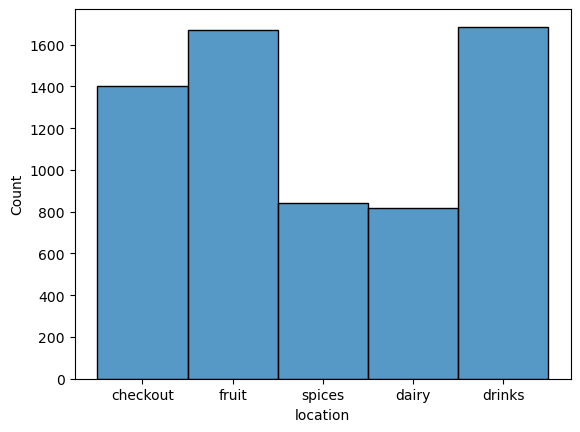

In [1091]:
sns.histplot(dff['location'])

In [1092]:
dff['time']=pd.to_datetime(dff['time'])
#df=df.set_index('timestamp')
dff['day']= dff['time'].dt.day
dff['hour']= dff['time'].dt.hour
dff['minute']= dff['time'].dt.minute
dff

,time,customer_id,location,day,hour,minute
0,1989-04-21 09:00:00,1,checkout,21,9,0
1,1989-04-21 09:00:00,2,checkout,21,9,0
2,1989-04-21 09:02:00,1,fruit,21,9,2
3,1989-04-21 09:02:00,2,fruit,21,9,2
4,1989-04-21 09:02:00,2,fruit,21,9,2
...,...,...,...,...,...,...
6413,1989-04-21 20:30:00,2246,dairy,21,20,30
6414,1989-04-21 20:30:00,2252,fruit,21,20,30
6415,1989-04-21 20:30:00,2137,dairy,21,20,30
6416,1989-04-21 20:30:00,2248,checkout,21,20,30


<AxesSubplot:xlabel='time'>

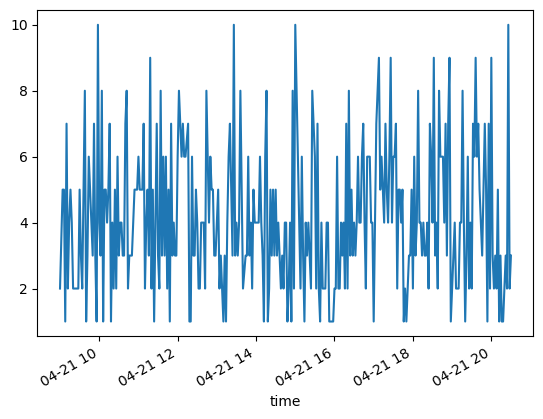

In [1093]:
dff_checkout=dff.loc[dff['location']=='checkout']
dff_checkout.groupby('time')['customer_id'].count().plot()

In [1094]:
time_per_day_per_cus=dff.groupby(['customer_id','day'])['time'].apply(lambda x: x.max()-x.min())
time_per_day_per_cus

customer_id  day
1            21    0 days 00:10:00
2            21    0 days 00:04:00
5            21    0 days 00:02:00
6            21    0 days 00:34:00
7            21    0 days 00:02:00
                         ...      
2249         21    0 days 00:04:00
2250         21    0 days 00:04:00
2251         21    0 days 00:04:00
2252         21    0 days 00:04:00
2295         21    0 days 00:02:00
Name: time, Length: 705, dtype: timedelta64[ns]

In [1095]:
time_per_day_per_cus.mean()

Timedelta('0 days 00:09:06.212765957')

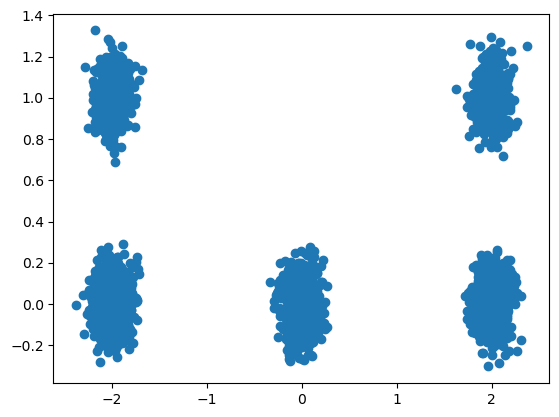

In [1096]:
plt.scatter(netto.a, netto.b)